In [1]:
from tensorflow.keras import datasets
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# 라벨 설정
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

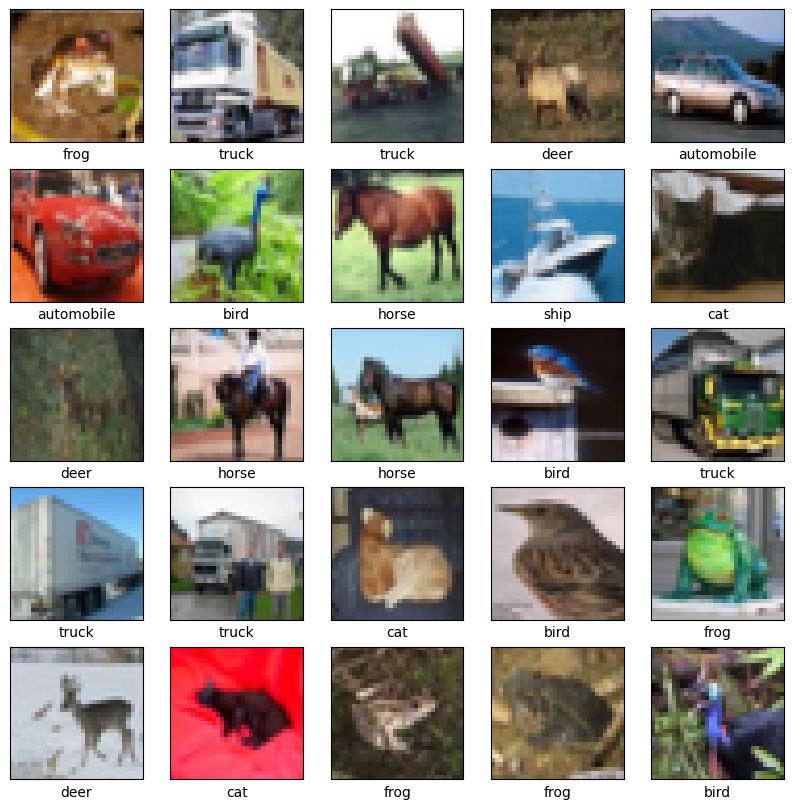

In [2]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [4]:
#Sequential()로 model 인스턴스를 생성한다.
#Conv2D를 통해 컨볼루션 레이어를 추가한다. 필터와 노드수, 활성함수를 정한다.
#뎁스 32, 필터 (3,3), 활성함수 relu, 인풋사이즈 (32,32에 3채널)
#MaxPooling2D를 지정해준다. 사이즈 (2,2) > default이기도 함.
#Conv와 Pooling을 반복한 뒤, Flatten으로 이미지를 1차원으로 변형
#이후 FC에 넣어 은닉층 하나를 거쳐 최종 softmax를 취해 10개 라벨을 분류한다.
model = Sequential()
model.add(Conv2D(32, 3, activation = 'relu', input_shape=(32,32,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, 3, activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, 3, activation = 'relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
#옵티마이저를 설정한다. adam이 가장 범용적으로 자주 사용되는 녀석
#여러가지 분류를 진행할때 0과1이 아닌 숫자로 구분을 하기 위해선 categorical보다 sparse_categorical_crossentropy를 사용하도록 한다.
#metric은 가장 기본적인 accuracy로 지정한다.
#model fit을 진행한다.
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
              
model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.3338 - loss: 1.7929 - val_accuracy: 0.5193 - val_loss: 1.3547
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.5713 - loss: 1.2060 - val_accuracy: 0.6022 - val_loss: 1.1296
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.6415 - loss: 1.0246 - val_accuracy: 0.6510 - val_loss: 1.0064
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.6807 - loss: 0.9111 - val_accuracy: 0.6727 - val_loss: 0.9565
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.7124 - loss: 0.8323 - val_accuracy: 0.6807 - val_loss: 0.9220
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.7295 - loss: 0.7680 - val_accuracy: 0.6741 - val_loss: 0.9483
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.7492 - loss: 0.7168 - val_accuracy: 0.6898 - val_loss: 0.9180
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.7624 -

In [6]:
# 수행
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

313/313 - 1s - 4ms/step - accuracy: 0.7016 - loss: 0.8967


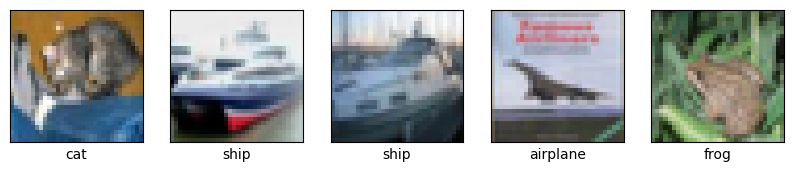

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[test_labels[i][0]])
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


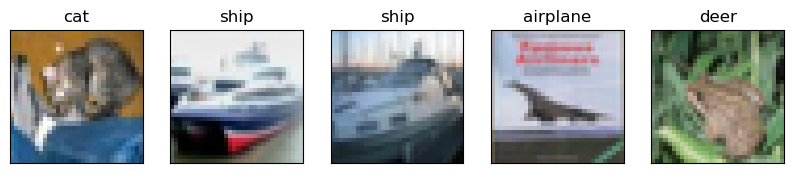

In [10]:
import numpy as np

plt.figure(figsize=(10,10))
for i in range(5):
  x = np.expand_dims(test_images[i], axis=0) # 이미지의 차원을 맞추기 위해 늘려줘야한다.
  predictions = model.predict(x) # 예측을 진행한다.
  predicted_ids = np.argmax(predictions, axis=-1)
  predicted_class_names = class_names[predicted_ids[0]]
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(test_images[i], cmap=plt.cm.binary)
  plt.title(predicted_class_names)

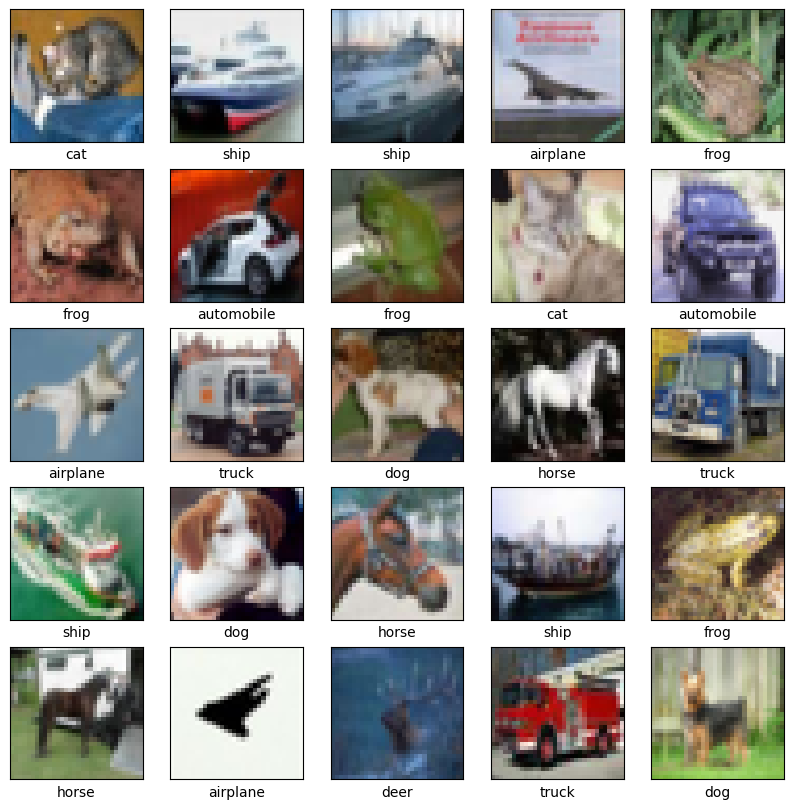

In [11]:
#전이학습(Transfer Learning)을 이용한 분류작업
from tensorflow.keras import datasets

# 케라스 데이터셋을 다운받아 변수에 각각 넣어준다.
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# 라벨 설정
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# 이미지 불러보기
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[test_labels[i][0]])
plt.show()

In [13]:
#$include_top = True로 설정해 분류기를 그대로 가져온다. 기존 ResNet이 갖고 있던 1000개 class를 분류하는 분류기에서 이미지 데이터를 입력받아 분류한다.
#weights = 'imagenet'을 통해 imagenet에 사용된 사전학습시의 weights를 가져온다.
#input_shape은 이번 모델링이 최종 ResNet 모델만을 사용하는 것이기 때문에 ResNet의 Input 사이즈인 224x224와 3개 채널로 맞춰논다.
from tensorflow.keras.applications.resnet50 import ResNet50
base_model = ResNet50(include_top=True, input_shape = (224, 224 ,3), weights = 'imagenet')
base_model.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)    │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_pad (ZeroPadding2D)     │ (None, 230, 230, 3)       │               0 │ input_layer_3[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_conv (Conv2D)           │ (None, 112, 112, 64)      │           9,472 │ conv1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_bn (BatchNormalization) │ (None, 112, 112, 64)      │             256 │ conv1_conv[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_relu (Activation)       │ (None, 112, 112, 64)      │               0 │ conv1_bn[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pad (ZeroPadding2D)     │ (None, 114, 114, 64)      │               0 │ conv1_relu[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pool (MaxPooling2D)     │ (None, 56, 56, 64)        │               0 │ pool1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_conv (Conv2D)  │ (None, 56, 56, 64)        │           4,160 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_bn             │ (None, 56, 56, 64)        │             256 │ conv2_block1_1_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_relu           │ (None, 56, 56, 64)        │               0 │ conv2_block1_1_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_conv (Conv2D)  │ (None, 56, 56, 64)        │          36,928 │ conv2_block1_1_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_bn             │ (None, 56, 56, 64)        │             256 │ conv2_block1_2_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_relu           │ (None, 56, 56, 64)        │               0 │ conv2_block1_2_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_0_conv (Conv2D)  │ (None, 56, 56, 256)       │          16,640 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_3_conv (Conv2D)  │ (None, 56, 56, 256)       │          16,640 │ conv2_block1_2_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 25,636,712 (97.80 MB)

 Trainable params: 25,583,592 (97.59 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [20]:
import tensorflow as tf
from tensorflow.keras.layers import RandomRotation

base_model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
for i in range(5):
    inputs = test_images[i]                 
    inputs = tf.expand_dims(inputs, axis=0) # 차원을 (None, 224, 224, 3) 형태로 맞춤
    x = tf.keras.layers.Resizing(224, 224)(inputs) # experimental 제거
    x = tf.keras.applications.resnet50.preprocess_input(x)
    base_model.evaluate(x, test_labels[i])

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.0000e+00 - loss: 24.0597
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - accuracy: 0.0000e+00 - loss: 11.1655
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - accuracy: 0.0000e+00 - loss: 7.9895
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - accuracy: 0.0000e+00 - loss: 14.1420
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - accuracy: 0.0000e+00 - loss: 13.9919


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


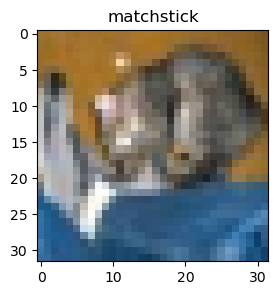

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


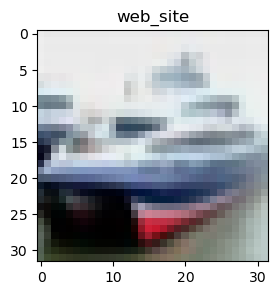

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


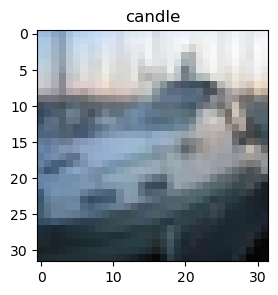

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


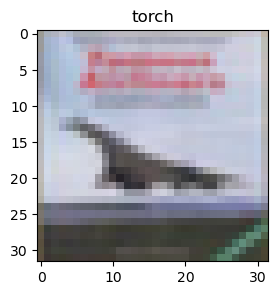

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


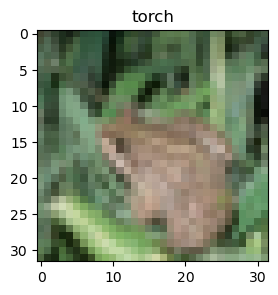

In [22]:
import matplotlib.pyplot as plt
from tensorflow.keras.applications.resnet50 import decode_predictions

for i in range(5):
   inputs = test_images[i]
   inputs = tf.expand_dims(inputs, axis=0)
   x = tf.keras.layers.Resizing(224, 224)(inputs)  # experimental.preprocessing 제거
   x = tf.keras.applications.resnet50.preprocess_input(x)

   preds = base_model.predict(x)  # ResNet Model의 예측 진행

   # 예측 결과 시각화
   fig = plt.figure(figsize=(3,3))
   plt.title(decode_predictions(preds, top=1)[0][0][1])  # 1순위 예측 클래스를 제목으로
   plt.imshow(test_images[i])
   plt.show()

In [24]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D
from tensorflow.keras import datasets
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import Input
from tensorflow.keras.layers import Dropout, BatchNormalization


# 데이터셋 불러오기
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# ResNet50 불러오기 
base_model = ResNet50(include_top=False, pooling='avg', input_shape=(32,32,3), weights='imagenet')
base_model.trainable = False

# 레이블 원-핫 인코딩
input_y = tf.keras.utils.to_categorical(train_labels, 10)
test_y = tf.keras.utils.to_categorical(test_labels, 10)

# 모델 layer 설계
inputs = Input(shape=(32,32,3))
x = tf.keras.layers.Resizing(32, 32)(inputs)  # experimental.preprocessing 제거
x = tf.keras.applications.resnet50.preprocess_input(inputs)
x = base_model(x, training=False)
x = Flatten()(x)                              # Fully Connected 층을 위해 펼치기
outputs = Dense(10, activation='softmax')(x)   # 10개 클래스 분류를 위한 소프트맥스 층
model_res = tf.keras.Model(inputs, outputs)    # 모델 생성

In [25]:
# 모델 컴파일 진행 - 아까와 달리 categorical_crossentropy 사용 > label이 숫자형 데이터이므로
model_res.compile(optimizer = tf.keras.optimizers.Adam(learning_rate= 0.001),
                  loss = 'categorical_crossentropy',
                  metrics=['accuracy'])

# early stopping 설정
early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

# 모델 fitting
model_res.fit(train_images, input_y, epochs = 10, validation_data=(test_images, test_y), batch_size= 256, callbacks=[early])

Epoch 1/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 121s 586ms/step - accuracy: 0.4520 - loss: 2.2226 - val_accuracy: 0.6120 - val_loss: 1.2338
Epoch 2/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 111s 568ms/step - accuracy: 0.6415 - loss: 1.0910 - val_accuracy: 0.6332 - val_loss: 1.1469
Epoch 3/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 115s 585ms/step - accuracy: 0.6754 - loss: 0.9543 - val_accuracy: 0.6497 - val_loss: 1.0813
Epoch 4/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 112s 572ms/step - accuracy: 0.6965 - loss: 0.8800 - val_accuracy: 0.6457 - val_loss: 1.0836
Epoch 5/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 112s 573ms/step - accuracy: 0.7116 - loss: 0.8396 - val_accuracy: 0.6525 - val_loss: 1.0731
Epoch 6/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 112s 570ms/step - accuracy: 0.7122 - loss: 0.8221 - val_accuracy: 0.6494 - val_loss: 1.0737
Epoch 7/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 116s 594ms/step - accuracy: 0.7215 - loss: 0.8054 - val_accuracy: 0.6574 - val_loss: 1.0566
Epoch 8/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 186s 950ms/step - accuracy: 0.7262 -

In [26]:
#전이학습 미세조정을 통해 모델을 좀 더 발전시킨다.
save = model_res.fit(train_images, input_y, epochs = 10, validation_data=(test_images, test_y), batch_size= 256, callbacks=[early])

Epoch 1/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 131s 670ms/step - accuracy: 0.7319 - loss: 0.7670 - val_accuracy: 0.6557 - val_loss: 1.0948
Epoch 2/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 132s 675ms/step - accuracy: 0.7361 - loss: 0.7554 - val_accuracy: 0.6452 - val_loss: 1.1215
Epoch 3/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 131s 667ms/step - accuracy: 0.7352 - loss: 0.7568 - val_accuracy: 0.6487 - val_loss: 1.1287
Epoch 4/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 131s 668ms/step - accuracy: 0.7364 - loss: 0.7523 - val_accuracy: 0.6517 - val_loss: 1.1177
Epoch 5/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 131s 668ms/step - accuracy: 0.7352 - loss: 0.7509 - val_accuracy: 0.6429 - val_loss: 1.1513
Epoch 6/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 132s 672ms/step - accuracy: 0.7400 - loss: 0.7406 - val_accuracy: 0.6520 - val_loss: 1.1216


In [27]:
#미세조정을 위한 resnet 모델 일부 동결 해제
base_model.trainable = True		# resnet 모델 학습동결을 해제한다
for i in base_model.layers[:143]:	# 143층부터의 학습은 해제상태로 두고, 
  i.trainable = False				# 이전까지의 학습은 동결한다.
  
for i in base_model.layers[140:]:	# 동결이 제대로 해제됐는지 약간 이전층부터 출력해본다.
  print(i.name, i.trainable)

conv4_block6_3_bn False
conv4_block6_add False
conv4_block6_out False
conv5_block1_1_conv True
conv5_block1_1_bn True
conv5_block1_1_relu True
conv5_block1_2_conv True
conv5_block1_2_bn True
conv5_block1_2_relu True
conv5_block1_0_conv True
conv5_block1_3_conv True
conv5_block1_0_bn True
conv5_block1_3_bn True
conv5_block1_add True
conv5_block1_out True
conv5_block2_1_conv True
conv5_block2_1_bn True
conv5_block2_1_relu True
conv5_block2_2_conv True
conv5_block2_2_bn True
conv5_block2_2_relu True
conv5_block2_3_conv True
conv5_block2_3_bn True
conv5_block2_add True
conv5_block2_out True
conv5_block3_1_conv True
conv5_block3_1_bn True
conv5_block3_1_relu True
conv5_block3_2_conv True
conv5_block3_2_bn True
conv5_block3_2_relu True
conv5_block3_3_conv True
conv5_block3_3_bn True
conv5_block3_add True
conv5_block3_out True
avg_pool True


In [28]:
#동결 해제 후 재 컴파일진행
model_res.compile(optimizer = tf.keras.optimizers.Adam( learning_rate= 0.0001),
                  loss = 'categorical_crossentropy',
                  metrics=['accuracy'])

early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

model_res.summary()

Model: "functional_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)    │ (None, 32, 32, 3)         │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ get_item (GetItem)            │ (None, 32, 32)            │               0 │ input_layer_7[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ get_item_1 (GetItem)          │ (None, 32, 32)            │               0 │ input_layer_7[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ get_item_2 (GetItem)          │ (None, 32, 32)            │               0 │ input_layer_7[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ stack (Stack)                 │ (None, 32, 32, 3)         │               0 │ get_item[0][0],            │
│                               │                           │                 │ get_item_1[0][0],          │
│                               │                           │                 │ get_item_2[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ add (Add)                     │ (None, 32, 32, 3)         │               0 │ stack[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ resnet50 (Functional)         │ (None, 2048)              │      23,587,712 │ add[0][0]                  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ flatten_2 (Flatten)           │ (None, 2048)              │               0 │ resnet50[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_4 (Dense)               │ (None, 10)                │          20,490 │ flatten_2[0][0]            │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 23,608,202 (90.06 MB)

 Trainable params: 14,996,490 (57.21 MB)

 Non-trainable params: 8,611,712 (32.85 MB)

In [29]:
# 143부터 전체 열고 간다. 마지막 블록을 열고 진행
save_fine = model_res.fit(train_images, input_y, epochs = 50, initial_epoch = save.epoch[-1],validation_data=(test_images, test_y), batch_size= 256, callbacks = [early])

Epoch 6/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 662s 3s/step - accuracy: 0.6062 - loss: 1.2615 - val_accuracy: 0.6570 - val_loss: 1.0147
Epoch 7/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 639s 3s/step - accuracy: 0.8532 - loss: 0.4499 - val_accuracy: 0.6743 - val_loss: 1.0148
Epoch 8/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 647s 3s/step - accuracy: 0.9541 - loss: 0.1957 - val_accuracy: 0.6748 - val_loss: 1.0768
Epoch 9/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 714s 4s/step - accuracy: 0.9908 - loss: 0.0801 - val_accuracy: 0.6825 - val_loss: 1.1160
Epoch 10/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 673s 3s/step - accuracy: 0.9984 - loss: 0.0364 - val_accuracy: 0.6815 - val_loss: 1.1695
Epoch 11/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 689s 4s/step - accuracy: 0.9997 - loss: 0.0191 - val_accuracy: 0.6834 - val_loss: 1.2106


In [31]:
#전이학습 모델의 구조만 가져와서 학습하기
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D
from tensorflow.keras import datasets

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

from tensorflow.keras.applications.resnet50 import ResNet50
base_model = ResNet50(include_top=False, pooling = 'avg' , input_shape = (32,32 ,3), weights = None)

base_model.trainable =True

input_y = tf.keras.utils.to_categorical(train_labels, 10)
test_y = tf.keras.utils.to_categorical(test_labels, 10)

from tensorflow.keras import Input

inputs = Input(shape=(32,32,3))
x = tf.keras.applications.resnet50.preprocess_input(inputs)
x = base_model(x, training=False)
x = Flatten()(x)
outputs = Dense(10, activation = 'softmax')(x)
model_res = tf.keras.Model(inputs, outputs)

In [1]:
#빈 내용에 구조만 갖다 쓰는 것이기 때문에 resnet50 불러오는 과정에서 weights=None으로 설정하여 사전학습 가중치를 가져오지 않는다.
#이후 base_model.trainable =True로 모든 resnet50 모델의 가중치를 열어놓아 학습하면 된다.
model_res.compile(optimizer = 'adam', loss= 'categorical_crossentropy', metrics=['accuracy'])
early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience= 5)

model_res.fit(train_images, input_y, epochs=30, batch_size=256, validation_data=(test_images, test_y), callbacks=[early])

NameError: name 'model_res' is not defined